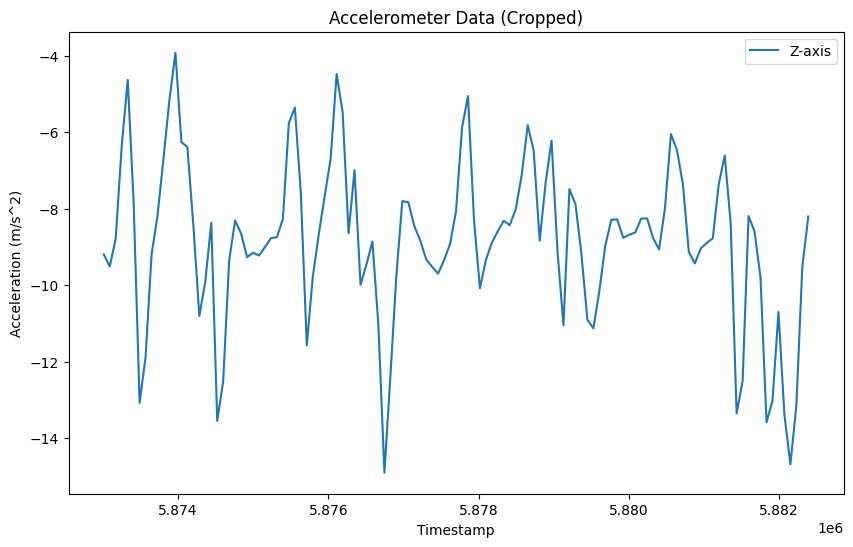

In [133]:
import json
import matplotlib.pyplot as plt

# Replace 'your_json_file.json' with the actual path to your JSON file
#json_file_path = 'jin set 1/20231201T141057Z_233830000763_acc_stream.json'
json_file_path = 'dim set 1/acc.json'

# Read JSON data from the file
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Define the start and end timestamps for cropping
start_timestamp = 5873000  # Replace with your desired start timestamp
end_timestamp = 5882400  # Replace with your desired end timestamp

# Extracting the accelerometer data within the specified timestamp range
timestamps = []
x_values = []
y_values = []
z_values = []

for entry in json_data["data"]:
    timestamp = entry["acc"]["Timestamp"]
    #print(timestamp)
    if start_timestamp <= timestamp <= end_timestamp:
        x = entry["acc"]["ArrayAcc"][0]["x"]
        y = entry["acc"]["ArrayAcc"][0]["y"]
        z = entry["acc"]["ArrayAcc"][0]["z"]

        timestamps.append(timestamp)
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

# Plotting the data
plt.figure(figsize=(10, 6))
#plt.plot(timestamps, x_values, label='X-axis')
#plt.plot(timestamps, y_values, label='Y-axis')
plt.plot(timestamps, z_values, label='Z-axis')

plt.title('Accelerometer Data (Cropped)')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()



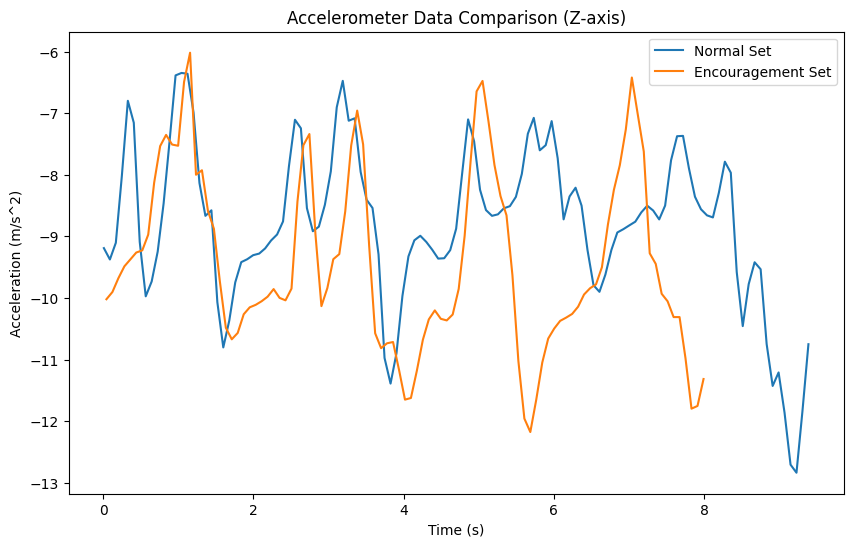

In [223]:
import json
import matplotlib.pyplot as plt
import pandas as pd

#jin1: 2058000 2066300
#jin2: 2773000 2778000
#kevin1: 400600 410000
#kevin2: 1290000 1296500
#marco1: 4493850 4505000
#marco2: 5163000 5170500
#jitse1: 2390100 2397000
#jitse2: 3105900 3112500
#dim1: 5873000 5882400
#dim2: 6541000 6549000


# Replace 'your_json_file.json' with the actual path to your JSON files
json_file_path1 = 'dim set 1/acc.json'
json_file_path2 = 'dim set 2/acc.json'

# Read JSON data from the first file
with open(json_file_path1, 'r') as file:
    json_data1 = json.load(file)

# Read JSON data from the second file
with open(json_file_path2, 'r') as file:
    json_data2 = json.load(file)

# Define the start and end timestamps for cropping for both datasets
start_timestamp1 = 5873000  # Replace with your desired start timestamp
end_timestamp1 = 5882400    # Replace with your desired end timestamp

start_timestamp2 = 6541000  # Replace with your desired start timestamp
end_timestamp2 = 6549000    # Replace with your desired end timestamp

# Extracting the accelerometer data within the specified timestamp range for both datasets
timestamps1 = []
z_values1 = []

for entry in json_data1["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp1 <= timestamp <= end_timestamp1:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps1.append((timestamp - start_timestamp1) /1000)  # Subtract the start timestamp
        z_values1.append(z)

timestamps2 = []
z_values2 = []

for entry in json_data2["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp2 <= timestamp <= end_timestamp2:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps2.append((timestamp - start_timestamp2) /1000)  # Subtract the start timestamp
        z_values2.append(z)

# Apply an EWMA filter to smooth the data
alpha = 0.3  # You can adjust the smoothing factor as needed
z_values1_smoothed = pd.Series(z_values1).ewm(alpha=alpha).mean()
z_values2_smoothed = pd.Series(z_values2).ewm(alpha=alpha).mean()

# Plotting the smoothed data from both datasets on the same graph
plt.figure(figsize=(10, 6))
plt.plot(timestamps1, z_values1_smoothed, label='Normal Set')
plt.plot(timestamps2, z_values2_smoothed, label='Encouragement Set')

plt.title('Accelerometer Data Comparison (Z-axis)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()




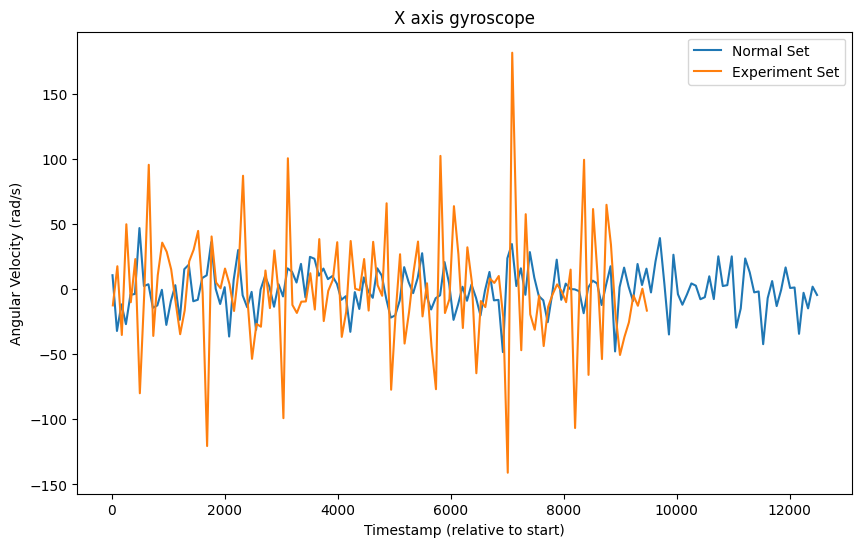

In [150]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_json_file.json' with the actual paths to your JSON files
json_file_path1 = 'jin set 1/20231201T141057Z_233830000763_gyro_stream.json'
json_file_path2 = 'jin set 2/20231201T142214Z_233830000763_gyro_stream.json'

# Read JSON data from the first file
with open(json_file_path1, 'r') as file:
    json_data1 = json.load(file)

# Read JSON data from the second file
with open(json_file_path2, 'r') as file:
    json_data2 = json.load(file)

# Define the start and end timestamps for cropping for both datasets
start_timestamp1 = 2057800  # Replace with your desired start timestamp
end_timestamp1 = 2070300    # Replace with your desired end timestamp

start_timestamp2 = 2773000  # Replace with your desired start timestamp
end_timestamp2 = 2782500    # Replace with your desired end timestamp

# Extracting the gyroscope data within the specified timestamp range for both datasets
gyro_timestamps1 = []
gyro_x_values1 = []
gyro_y_values1 = []
gyro_z_values1 = []

for entry in json_data1["data"]:
    timestamp = entry["gyroscope"]["Timestamp"]
    if start_timestamp1 <= timestamp <= end_timestamp1:
        x = entry["gyroscope"]["ArrayGyro"][0]["x"]
        y = entry["gyroscope"]["ArrayGyro"][0]["y"]
        z = entry["gyroscope"]["ArrayGyro"][0]["z"]

        gyro_timestamps1.append(timestamp - start_timestamp1)  # Subtract the start timestamp
        gyro_x_values1.append(x)
        gyro_y_values1.append(y)
        gyro_z_values1.append(z)

gyro_timestamps2 = []
gyro_x_values2 = []
gyro_y_values2 = []
gyro_z_values2 = []

for entry in json_data2["data"]:
    timestamp = entry["gyroscope"]["Timestamp"]
    if start_timestamp2 <= timestamp <= end_timestamp2:
        x = entry["gyroscope"]["ArrayGyro"][0]["x"]
        y = entry["gyroscope"]["ArrayGyro"][0]["y"]
        z = entry["gyroscope"]["ArrayGyro"][0]["z"]

        gyro_timestamps2.append(timestamp - start_timestamp2)  # Subtract the start timestamp
        gyro_x_values2.append(x)
        gyro_y_values2.append(y)
        gyro_z_values2.append(z)

# Apply an EWMA filter to smooth the gyroscope data
alpha = 1  # You can adjust the smoothing factor as needed
gyro_x_values1_smoothed = pd.Series(gyro_x_values1).ewm(alpha=alpha).mean()
gyro_y_values1_smoothed = pd.Series(gyro_y_values1).ewm(alpha=alpha).mean()
gyro_z_values1_smoothed = pd.Series(gyro_z_values1).ewm(alpha=alpha).mean()

gyro_x_values2_smoothed = pd.Series(gyro_x_values2).ewm(alpha=alpha).mean()
gyro_y_values2_smoothed = pd.Series(gyro_y_values2).ewm(alpha=alpha).mean()
gyro_z_values2_smoothed = pd.Series(gyro_z_values2).ewm(alpha=alpha).mean()

# Plotting the smoothed gyroscope data from both datasets on the same graph
plt.figure(figsize=(10, 6))
plt.plot(gyro_timestamps1, gyro_x_values1_smoothed, label='Normal Set')
#plt.plot(gyro_timestamps1, gyro_y_values1_smoothed, label='Dataset 1 (Y-axis Smoothed)')
#plt.plot(gyro_timestamps1, gyro_z_values1_smoothed, label='Dataset 1 (Z-axis Smoothed)')

plt.plot(gyro_timestamps2, gyro_x_values2_smoothed, label='Experiment Set')
#plt.plot(gyro_timestamps2, gyro_y_values2_smoothed, label='Dataset 2 (Y-axis Smoothed)')
#plt.plot(gyro_timestamps2, gyro_z_values2_smoothed, label='Dataset 2 (Z-axis Smoothed)')

plt.title('X axis gyroscope')
plt.xlabel('Timestamp (relative to start)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.show()



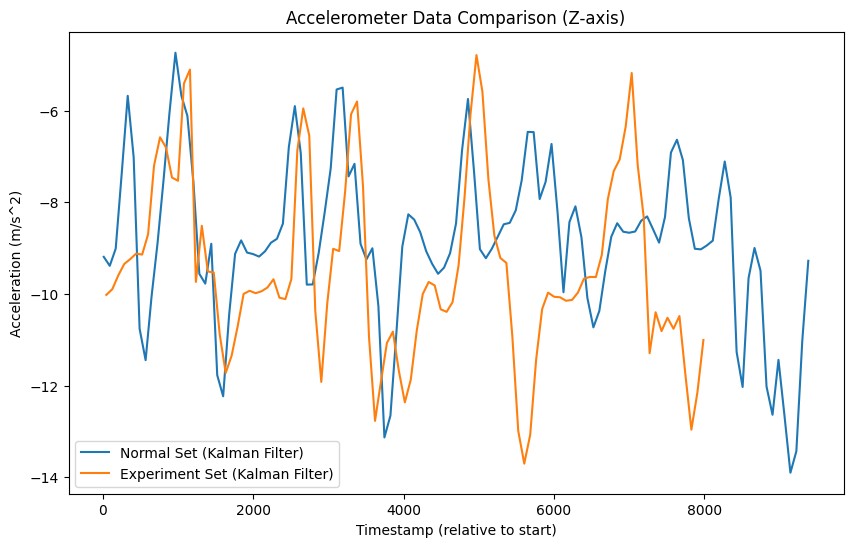

In [205]:
import json
import matplotlib.pyplot as plt
import numpy as np
from filterpy.kalman import KalmanFilter

#jin1: 2058000 2066300
#jin2: 2773000 2778000
#kevin1: 400600 410000
#kevin2: 1290000 1296500
#marco1: 4493850 4505000
#marco2: 5163000 5170500
#jitse1: 2390100 2397000
#jitse2: 3105900 3112500
#dim1: 5873000 5882400
#dim2: 6541000 6549000

# Replace 'your_json_file.json' with the actual path to your JSON files
json_file_path1 = 'dim set 1/acc.json'
json_file_path2 = 'dim set 2/acc.json'

# Read JSON data from the first file
with open(json_file_path1, 'r') as file:
    json_data1 = json.load(file)

# Read JSON data from the second file
with open(json_file_path2, 'r') as file:
    json_data2 = json.load(file)

# Define the start and end timestamps for cropping for both datasets
start_timestamp1 = 5873000  # Replace with your desired start timestamp
end_timestamp1 = 5882400    # Replace with your desired end timestamp

start_timestamp2 = 6541000  # Replace with your desired start timestamp
end_timestamp2 = 6549000   # Replace with your desired end timestamp

# Extracting the accelerometer data within the specified timestamp range for both datasets
timestamps1 = []
z_values1 = []

for entry in json_data1["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp1 <= timestamp <= end_timestamp1:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps1.append(timestamp - start_timestamp1)  # Subtract the start timestamp
        z_values1.append(z)

timestamps2 = []
z_values2 = []

for entry in json_data2["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp2 <= timestamp <= end_timestamp2:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps2.append(timestamp - start_timestamp2)  # Subtract the start timestamp
        z_values2.append(z)

# Create Kalman filters for both datasets
kf1 = KalmanFilter(dim_x=1, dim_z=1)
kf1.x = np.array([z_values1[0]])  # Initial state
kf1.F = np.array([[1]])  # State transition matrix
kf1.H = np.array([[1]])  # Measurement matrix
kf1.P *= 1  # Covariance matrix
kf1.R = 1  # Measurement noise

kf2 = KalmanFilter(dim_x=1, dim_z=1)
kf2.x = np.array([z_values2[0]])  # Initial state
kf2.F = np.array([[1]])  # State transition matrix
kf2.H = np.array([[1]])  # Measurement matrix
kf2.P *= 1  # Covariance matrix
kf2.R = 1  # Measurement noise

# Smoothing the data using Kalman filter
z_values1_smoothed = []
for z in z_values1:
    kf1.predict()
    kf1.update(z)
    z_values1_smoothed.append(kf1.x[0])

z_values2_smoothed = []
for z in z_values2:
    kf2.predict()
    kf2.update(z)
    z_values2_smoothed.append(kf2.x[0])

# Plotting the smoothed data from both datasets on the same graph
plt.figure(figsize=(10, 6))
plt.plot(timestamps1, z_values1_smoothed, label='Normal Set (Kalman Filter)')
plt.plot(timestamps2, z_values2_smoothed, label='Experiment Set (Kalman Filter)')

plt.title('Accelerometer Data Comparison (Z-axis)')
plt.xlabel('Timestamp (relative to start)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()


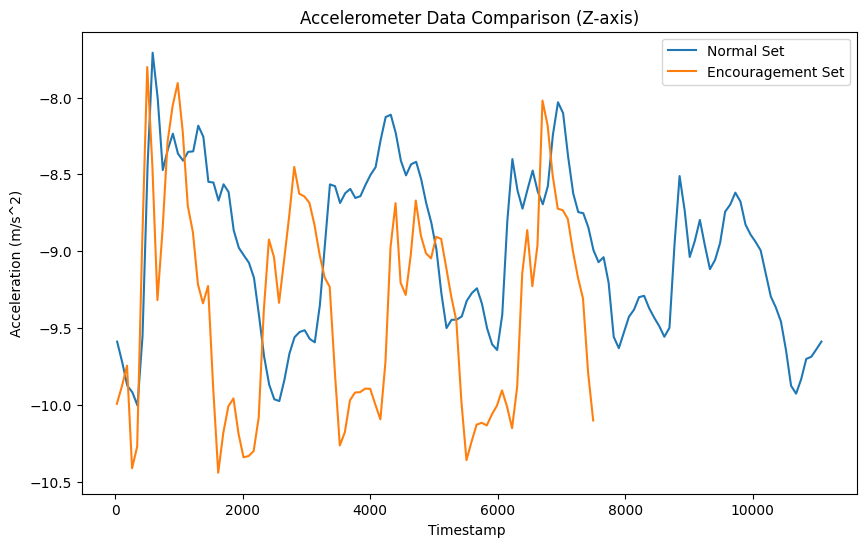

In [186]:
import json
import matplotlib.pyplot as plt
import pandas as pd

#jin1: 2058000 2066300
#jin2: 2773000 2778000
#kevin1: 400500 410000
#kevin2: 1290000 1296500
#marco1: 4492500 4505000
#marco2: 5163000 5170500
#jitse1: 2391000 2397000
#jitse2: 3106000 3112500
#dim1: 5873000 5882400
#dim2: 6541000 6549000


# Replace 'your_json_file.json' with the actual path to your JSON files
json_file_path1 = 'marco set 1/acc.json'
json_file_path2 = 'marco set 2/acc.json'

# Read JSON data from the first file
with open(json_file_path1, 'r') as file:
    json_data1 = json.load(file)

# Read JSON data from the second file
with open(json_file_path2, 'r') as file:
    json_data2 = json.load(file)

# Define the start and end timestamps for cropping for both datasets
start_timestamp1 = 4493850  # Replace with your desired start timestamp
end_timestamp1 = 4505000    # Replace with your desired end timestamp

start_timestamp2 = 5163000  # Replace with your desired start timestamp
end_timestamp2 = 5170500    # Replace with your desired end timestamp

# Extracting the accelerometer data within the specified timestamp range for both datasets
timestamps1 = []
z_values1 = []

for entry in json_data1["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp1 <= timestamp <= end_timestamp1:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps1.append(timestamp - start_timestamp1)  # Subtract the start timestamp
        z_values1.append(z)

timestamps2 = []
z_values2 = []

for entry in json_data2["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp2 <= timestamp <= end_timestamp2:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps2.append(timestamp - start_timestamp2)  # Subtract the start timestamp
        z_values2.append(z)

# Apply an EWMA filter to smooth the data
alpha = 0.1  # You can adjust the smoothing factor as needed
z_values1_smoothed = pd.Series(z_values1).ewm(alpha=alpha).mean()
z_values2_smoothed = pd.Series(z_values2).ewm(alpha=alpha).mean()

# Plotting the smoothed data from both datasets on the same graph
plt.figure(figsize=(10, 6))
plt.plot(timestamps1, z_values1_smoothed, label='Normal Set')
plt.plot(timestamps2, z_values2_smoothed, label='Encouragement Set')

plt.title('Accelerometer Data Comparison (Z-axis)')
plt.xlabel('Timestamp ')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()

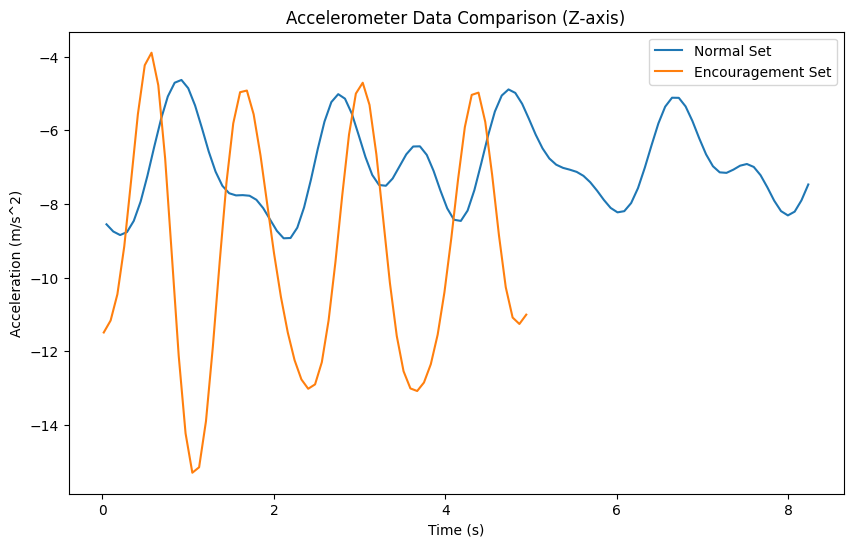

In [257]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt

#jin1: 2058000 2066300
#jin2: 2773000 2778000
#kevin1: 400500 410000
#kevin2: 1290000 1296500
#marco1: 4492500 4505000
#marco2: 5163000 5170500
#jitse1: 2390300 2397000
#jitse2: 3106000 3112500
#dim1: 5873000 5882400
#dim2: 6541000 6549000


# Replace 'your_json_file.json' with the actual path to your JSON files
json_file_path1 = 'jin set 1/acc.json'
json_file_path2 = 'jin set 2/acc.json'

# Read JSON data from the first file
with open(json_file_path1, 'r') as file:
    json_data1 = json.load(file)

# Read JSON data from the second file
with open(json_file_path2, 'r') as file:
    json_data2 = json.load(file)

# Define the start and end timestamps for cropping for both datasets
start_timestamp1 = 2058000  # Replace with your desired start timestamp
end_timestamp1 = 2066300    # Replace with your desired end timestamp

start_timestamp2 = 2773000  # Replace with your desired start timestamp
end_timestamp2 = 2778000    # Replace with your desired end timestamp

# Extracting the accelerometer data within the specified timestamp range for both datasets
timestamps1 = []
z_values1 = []

for entry in json_data1["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp1 <= timestamp <= end_timestamp1:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps1.append((timestamp - start_timestamp1) / 1000)  # Subtract the start timestamp
        z_values1.append(z)

timestamps2 = []
z_values2 = []

for entry in json_data2["data"]:
    timestamp = entry["acc"]["Timestamp"]
    if start_timestamp2 <= timestamp <= end_timestamp2:
        z = entry["acc"]["ArrayAcc"][0]["z"]
        timestamps2.append((timestamp - start_timestamp2) / 1000)  # Subtract the start timestamp
        z_values2.append(z)

# Function to design a Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load your JSON data (assuming this part remains the same)
# ...

# Define the filter parameters
cutoff = 6  # Cutoff frequency in Hz (you may need to adjust this)
fs = 52    # Sampling frequency in Hz (adjust as per your data)
order = 10  # Order of the filter (can be adjusted based on the required sharpness of the filter)

# Apply the Butterworth filter to your data
z_values1_filtered = butter_lowpass_filter(z_values1, cutoff, fs, order)
z_values2_filtered = butter_lowpass_filter(z_values2, cutoff, fs, order)

# Plotting the filtered data
plt.figure(figsize=(10, 6))
plt.plot(timestamps1, z_values1_filtered, label='Normal Set')
plt.plot(timestamps2, z_values2_filtered, label='Encouragement Set')
plt.title('Accelerometer Data Comparison (Z-axis)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.savefig('IMU Jin.png', dpi=300)
plt.show()


